In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns

import statsmodels.api as sm

from utils import *

,Price,Volume
uke,,
2000-01-17,31.03,4043
2000-01-24,30.95,3730
2000-01-31,31.30,3831
2000-02-07,32.53,4415
2000-02-14,32.46,4617
...,...,...
2023-07-31,83.28,20469
2023-08-07,80.26,21060
2023-08-14,78.14,22698


Volume    0.391433
dtype: float64


<Axes: xlabel='Volume', ylabel='Price'>

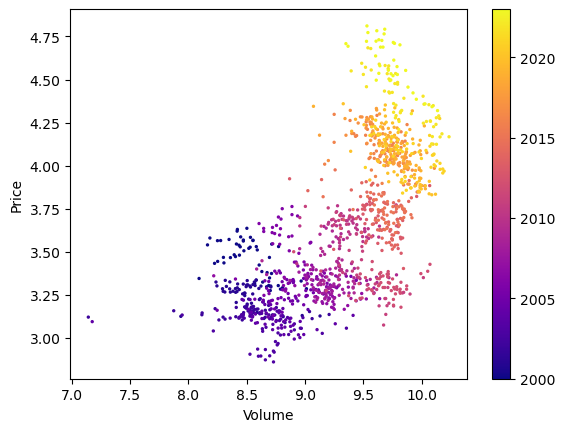

In [35]:
data_URL = 'https://www.ssb.no/statbank/sq/10085910'
data = import_salmon_data(data_URL)
data.rename({'Kilopris (kr)':'Price', 'Vekt (tonn)': 'Volume'}, inplace=True, axis='columns')

display(data)

log_data = data.agg(np.log, axis=1)

model = sm.OLS(log_data['Price'], log_data['Volume']).fit()

print(model.params)

log_data.plot(kind='scatter', y='Price', x='Volume', s=2, c=data.index.year, cmap='plasma')